Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

2023-09-17 14:54:42.992777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Importing dataset

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = False,
    vertical_flip = False
)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_set = train_datagen.flow_from_directory(
    "Alzheimer_s Dataset/train",
    target_size = (64,64),
    batch_size = 5,
    color_mode = "rgb",
    shuffle = False,
    class_mode = "categorical"
)

# valid_set = valid_datagen.flow_from_directory(
#     "Alzheimer_s Dataset/valid",
#     target_size=(64, 64),
#     color_mode="rgb",
#     batch_size=5,
#     class_mode="categorical",
#     shuffle=False,
# )


test_set = test_datagen.flow_from_directory(
    "Alzheimer_s Dataset/test",
    target_size = (64,64),
    batch_size = 5,
    color_mode = "rgb",
    shuffle = False,
    class_mode = None
    
)


Found 5012 images belonging to 4 classes.
Found 1247 images belonging to 4 classes.


(5, 64, 64, 3)


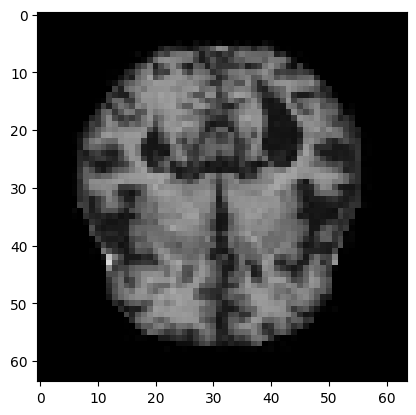

(5, 64, 64, 3)


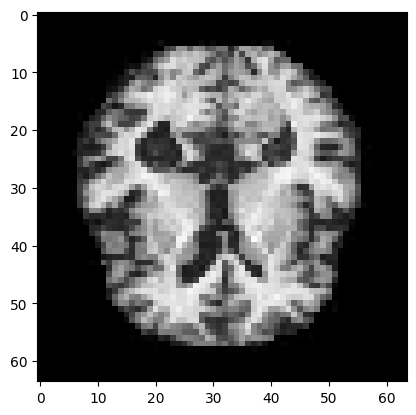

(5, 64, 64, 3)


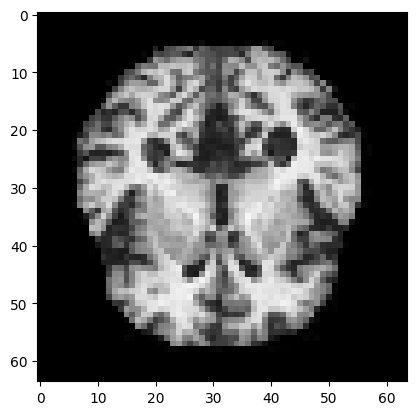

(5, 64, 64, 3)


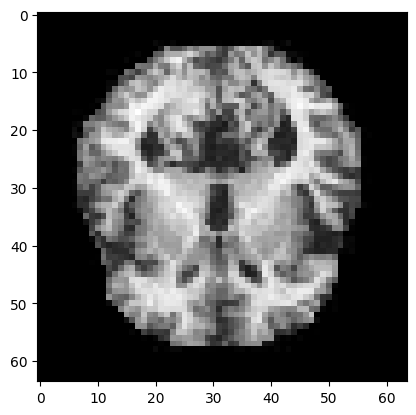

(5, 64, 64, 3)


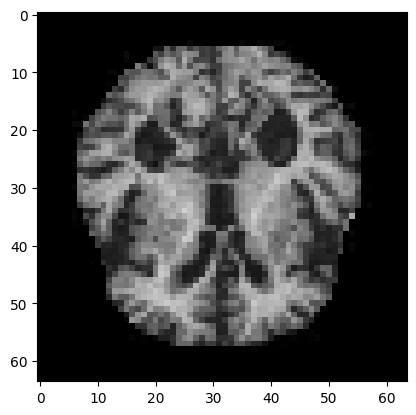

In [4]:
for _ in range(5):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

In [11]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
cnn.fit(x = train_set, validation_data = test_set, epochs = 15)

Epoch 1/15
1003/1003 [==============================] - 16s 16ms/step - loss: 0.1413 - accuracy: 0.9477 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
1003/1003 [==============================] - 15s 15ms/step - loss: 0.1042 - accuracy: 0.9617 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/15
1003/1003 [==============================] - 15s 15ms/step - loss: 0.0752 - accuracy: 0.9753 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/15
1003/1003 [==============================] - 15s 15ms/step - loss: 0.0921 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/15
1003/1003 [==============================] - 15s 15ms/step - loss: 0.0724 - accuracy: 0.9763 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/15
1003/1003 [==============================] - 16s 15ms/step - loss: 0.0540 - accuracy: 0.9808 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/15
1003/1003 [==============================] - 16s 15ms/step - loss

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("Alzheimer_s Dataset/valid/VeryMildDemented/27 (13).jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

from keras.utils import to_categorical
labels123 = to_categorical(np.argmax(result, 1), dtype = "int64")
print(labels123)
train_set.class_indices

1/1 [==============================] - 0s 27ms/step
[[0 0 1]]


{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}